# DeepBiome Example : list of input files 

Deepbiome packages takes microbiome abundance data as input and uses the phylogenetic taxonomy to guide the decision of the optimal number of layers and neurons in the deep learning architecture.

## 1. Load library

First, we have to load deepbiome package. The deepbiome package is build on the tensorflow and keras library

In [1]:
import logging
from deepbiome import deepbiome

Using TensorFlow backend.


## 2. Prepare the dataset

To use deepbiome, you can use the microbiome abundance data with the form:

- A list of input files for k times repeatition or k-fold cross validation.
- One input file for k times cross validation.

This notebook contains an example of training and test the deep neural netowrk using deepbiome.
In this example, we assume that we have __a list of input files for k times repeatition.__


Deepbiome needs 4 data as follow:
1. __the tree information__
1. __the list of the name of input files__
1. __the lists of the input files__
1. __y__

In addition, we can set __the training index for each repeatition__. If we set the index file, deepbiome build the training set for each repeatition based on each fold index in the index file.


Eath data should have the csv format. Below is the example of each file.

In [2]:
import pandas as pd
from pkg_resources import resource_filename

### Example of the tree information

First we need a file about the phylogenetic tree information. This tree information file should have the format below:

In [3]:
tree_information = pd.read_csv(resource_filename('deepbiome', 'tests/data/genus48_dic.csv'))
tree_information

,Genus,Family,Order,Class,Phylum,Domain
0,Streptococcus,Streptococcaceae,Lactobacillales,Bacilli,Firmicutes,Bacteria
1,Tropheryma,Cellulomonadaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
2,Veillonella,Veillonellaceae,Selenomonadales,Negativicutes,Firmicutes,Bacteria
3,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
4,Flavobacterium,Flavobacteriaceae,Flavobacteriales,Flavobacteria,Bacteroidetes,Bacteria
5,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
6,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
7,Parvimonas,Clostridiales_Incertae_Sedis_XI,Clostridiales,Clostridia,Firmicutes,Bacteria
8,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteria,Fusobacteria,Bacteria
9,Propionibacterium,Propionibacteriaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria


### Example of the list of the name of input files

If we want to use the list of the input files, we need the make a list of the name of each input file with the format below:

In [4]:
list_of_input_files = pd.read_csv(resource_filename('deepbiome', 'tests/data/gcount_list.csv'), header=None)
list_of_input_files

,0
0,gcount_0001.csv
1,gcount_0002.csv
2,gcount_0003.csv
3,gcount_0004.csv
4,gcount_0005.csv
5,gcount_0006.csv
6,gcount_0007.csv
7,gcount_0008.csv
8,gcount_0009.csv
9,gcount_0010.csv


### Example of the lists of the input files

Below is an example of the each input file. This example has 1000 samples for each row, and the microbiome abandunt data for each column. 

In [5]:
x_1 = pd.read_csv(resource_filename('deepbiome', 'tests/data/count/%s' % list_of_input_files.iloc[0,0]))
x_1

,Streptococcus,Tropheryma,Veillonella,Actinomyces,Flavobacterium,Prevotella,Porphyromonas,Parvimonas,Fusobacterium,Propionibacterium,...,Microbacterium,Sphingomonas,Chryseobacterium,Bacteroides,Bdellovibrio,Streptophyta,Lachnospiracea_incertae_sedis,Paracoccus,Fastidiosipila,Pseudonocardia
0,841,0,813,505,5,3224,0,362,11,65,...,0,87,0,0,0,0,0,0,0,2133
1,1445,0,1,573,0,1278,82,85,69,154,...,0,1,2,0,0,0,0,0,0,3638
2,1259,0,805,650,0,1088,0,0,74,0,...,0,2,8,1,39,0,0,0,0,3445
3,982,0,327,594,0,960,81,19,9,0,...,157,1,0,4,60,0,0,0,0,3507
4,1162,0,130,969,163,1515,167,4,162,3,...,0,9,0,0,0,0,60,0,0,3945
5,1956,37,41,661,47,1555,374,7,142,19,...,0,12,0,0,0,0,0,0,0,2044
6,1037,14,83,1595,132,305,103,174,1195,0,...,0,20,4,0,4,0,0,0,0,3044
7,641,0,172,179,0,1312,84,9,81,376,...,0,8,0,0,0,0,0,0,0,3980
8,852,146,504,99,2,376,116,152,67,0,...,0,3,0,0,0,0,0,0,0,6007
9,901,3,187,1214,0,1508,675,0,107,49,...,0,0,0,0,1,0,29,0,0,2997


### Example of the Y (regression)

This is an example of the output file for regression problem. Below example file has 1000 samples in row, 1000 repeatition in column.

In [6]:
y = pd.read_csv(resource_filename('deepbiome', 'tests/data/regression_y.csv'))
y

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x991,x992,x993,x994,x995,x996,x997,x998,x999,x1000
0,4.997270,5.492354,5.473725,1.759484,5.313252,1.500044,4.949712,5.493533,3.743509,5.492373,...,2.793883,1.500004,5.487526,5.493518,3.599047,5.491461,5.486244,5.487390,5.493492,3.762523
1,5.004092,1.500002,4.640348,1.538071,5.491065,5.481009,5.492323,2.968531,3.576358,5.491456,...,1.500033,3.369529,1.500016,3.103297,5.493214,3.831125,5.492104,5.474811,5.492416,3.268805
2,5.485126,4.187426,5.491340,5.469662,5.490478,1.953375,5.494656,3.741680,4.862400,5.490701,...,5.491728,2.459981,5.475697,3.114158,1.500004,1.500019,4.113815,5.470539,5.494373,5.481754
3,5.489590,4.863187,1.500003,5.484699,5.492657,5.491270,4.091023,5.495239,5.492804,1.500046,...,1.500034,1.500012,5.483070,2.475049,5.493846,3.287076,3.696412,5.487583,1.500044,2.760404
4,1.500001,5.480769,5.489725,1.500044,2.695212,5.492262,3.381424,4.805420,1.500047,5.474376,...,1.500046,2.586990,5.440610,4.376103,1.500030,4.713223,5.491059,3.230658,1.500045,5.488727
5,5.475650,1.500018,1.500006,3.302819,5.495810,3.215871,1.500059,5.491045,3.953181,1.500018,...,5.372949,1.500006,5.464092,2.210893,5.475913,2.727001,2.295923,5.481114,5.474586,5.476136
6,5.489466,5.490050,1.500012,3.498694,5.490896,5.490793,2.694609,1.772404,5.135570,5.487218,...,5.492004,5.492134,2.879456,2.632757,5.493330,1.500017,5.480946,5.484973,5.496483,5.480691
7,5.484998,3.980235,1.500018,1.500021,1.500048,5.489788,5.490143,5.480488,1.500058,5.480046,...,4.218538,2.920123,1.500033,5.489365,5.495824,5.491758,1.745489,5.460217,4.441682,5.487948
8,1.500019,4.753235,5.469156,5.488368,5.492304,5.092785,2.358408,5.499567,1.500019,3.148143,...,5.491863,4.120579,2.515762,1.500005,1.500029,1.500015,5.490782,5.479362,3.503304,1.801515
9,2.103884,5.475660,3.673923,1.500011,1.500048,5.478439,5.376410,5.487052,5.484175,5.489370,...,5.483309,1.500031,5.489880,1.500004,1.500061,5.477982,3.965308,4.066227,1.500046,4.139418


For one repeatition, the deepbiome will use the one column.

In [7]:
y.iloc[:,0]

0      4.997270
1      5.004092
2      5.485126
3      5.489590
4      1.500001
5      5.475650
6      5.489466
7      5.484998
8      1.500019
9      2.103884
10     4.919240
11     5.474987
12     4.613816
13     5.428549
14     3.566103
15     5.488718
16     3.678727
17     1.500035
18     5.488435
19     1.500037
20     2.946309
21     1.706838
22     5.474946
23     1.500015
24     5.487635
25     5.483609
26     5.489009
27     5.488417
28     5.485098
29     1.500019
         ...   
970    1.500019
971    1.500019
972    1.500043
973    5.453226
974    3.660331
975    4.232795
976    5.490740
977    2.231885
978    5.468183
979    1.500019
980    5.490177
981    5.487896
982    5.487762
983    3.787620
984    5.482958
985    5.489566
986    5.489680
987    5.490979
988    1.500045
989    5.489508
990    2.305494
991    5.488728
992    5.487913
993    2.709288
994    4.286565
995    2.609926
996    5.488959
997    3.498418
998    5.486107
999    5.319623
Name: x1, Length: 1000, 

### Example of the Y (classification)

This is an example of the output file for classification problem. Below example file has 1000 samples in row, 1000 repeatition in column.

In [8]:
y = pd.read_csv(resource_filename('deepbiome', 'tests/data/classification_y.csv'))
y

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
6,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
7,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
8,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
y.iloc[:,0]

0      1.0
1      1.0
2      0.0
3      0.0
4      1.0
5      1.0
6      0.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     0.0
16     1.0
17     1.0
18     0.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     1.0
      ... 
970    1.0
971    1.0
972    1.0
973    1.0
974    1.0
975    1.0
976    0.0
977    1.0
978    1.0
979    1.0
980    0.0
981    0.0
982    0.0
983    1.0
984    0.0
985    0.0
986    0.0
987    0.0
988    1.0
989    0.0
990    1.0
991    0.0
992    0.0
993    1.0
994    1.0
995    1.0
996    0.0
997    1.0
998    0.0
999    1.0
Name: V1, Length: 1000, dtype: float64

### Exmple of the training index file for repetition

For each repeatition, we have to set the training and test set. If the index file is given, the deepbiome library set the training set and test set based on the index file. Below is the example of the index file. Each column has the training indexs for each repeatition. The deepbiome will only use the samples in this index set for training.

In [10]:
idxs = pd.read_csv(resource_filename('deepbiome', 'tests/data/regression_idx.csv'))
idxs

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
0,490.0,690.0,62.0,703.0,690.0,845.0,150.0,268.0,488.0,179.0,...,675.0,886.0,225.0,222.0,781.0,778.0,603.0,222.0,254.0,407.0
1,498.0,968.0,123.0,913.0,348.0,262.0,705.0,239.0,632.0,44.0,...,636.0,216.0,495.0,557.0,196.0,516.0,23.0,351.0,472.0,945.0
2,389.0,999.0,335.0,947.0,215.0,696.0,793.0,349.0,734.0,624.0,...,626.0,230.0,26.0,330.0,470.0,992.0,329.0,532.0,655.0,426.0
3,51.0,139.0,843.0,491.0,47.0,421.0,892.0,32.0,438.0,996.0,...,956.0,706.0,836.0,151.0,80.0,409.0,671.0,772.0,882.0,181.0
4,592.0,83.0,204.0,810.0,198.0,955.0,357.0,125.0,190.0,162.0,...,542.0,108.0,959.0,311.0,771.0,902.0,986.0,481.0,922.0,305.0
5,977.0,251.0,712.0,668.0,53.0,852.0,772.0,807.0,673.0,662.0,...,241.0,87.0,891.0,781.0,174.0,238.0,999.0,849.0,744.0,854.0
6,382.0,44.0,235.0,424.0,595.0,125.0,983.0,986.0,987.0,321.0,...,849.0,245.0,643.0,562.0,191.0,742.0,935.0,14.0,137.0,661.0
7,351.0,46.0,240.0,564.0,478.0,702.0,377.0,787.0,429.0,323.0,...,737.0,51.0,8.0,490.0,62.0,373.0,217.0,860.0,764.0,809.0
8,742.0,619.0,546.0,519.0,179.0,856.0,642.0,175.0,341.0,527.0,...,136.0,848.0,474.0,402.0,156.0,236.0,964.0,328.0,24.0,595.0
9,26.0,766.0,850.0,107.0,436.0,891.0,446.0,298.0,877.0,904.0,...,511.0,768.0,714.0,977.0,954.0,816.0,577.0,58.0,822.0,345.0


Below is the index set for 1st repeatition. From 1000 samples above, it uses 750 samples for training.

In [11]:
idxs.iloc[:,0]

0      490.0
1      498.0
2      389.0
3       51.0
4      592.0
5      977.0
6      382.0
7      351.0
8      742.0
9       26.0
10     876.0
11     241.0
12     679.0
13     885.0
14     173.0
15     774.0
16     584.0
17     313.0
18     768.0
19     398.0
20     748.0
21     369.0
22     611.0
23     408.0
24     761.0
25     442.0
26     664.0
27     930.0
28     802.0
29     830.0
       ...  
720      4.0
721    787.0
722    426.0
723    848.0
724    624.0
725     18.0
726    452.0
727    357.0
728    469.0
729     74.0
730    758.0
731    338.0
732    210.0
733     54.0
734    424.0
735    598.0
736    263.0
737     86.0
738    932.0
739    449.0
740     83.0
741    824.0
742    700.0
743     96.0
744    697.0
745    599.0
746    720.0
747     80.0
748    570.0
749    440.0
Name: V1, Length: 750, dtype: float64

## 3. Prepare the configuration

For detailed configuration, we used python dictionary as inputs for the main training function.
You can build the configuration information for the network training by:
1. the python dictionary format
1. the configufation file (.cfg).

In this notebook, we showed the dictionary python dictionary format configuration.

Please check the detailed information about each options in the [documantation](https://young-won.github.io/deepbiome/prerequisites.html#configuration)

### For preparing the configuration about the network information (`network_info`)

For giving the information about the training hyper-parameter, you have to provide the dictionary for configuration to netowrk_info field.
Your configuration for the network training should include the information about:

In [12]:
network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'lr': '0.01',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'network_class': 'DeepBiomeNetwork',
        'normalizer': 'normalize_minmax',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure'
    },
    'training_info': {
        'batch_size': '200', 
        'epochs': '10'
    },
    'validation_info': {
        'batch_size': 'None', 
        'validation_size': '0.2'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

### For preparing the configuration about the path information (`path_info`)

For giving the information about the path of dataset, paths for saving the trained weight and the evaluation results, you have to provide the dictionary for configuration to path_info feild.
Your configuration for the path information should include the information about:

In [13]:
path_info = {
    'data_info': {
        'count_list_path': resource_filename('deepbiome', 'tests/data/gcount_list.csv'),
        'count_path': resource_filename('deepbiome', 'tests/data/count'),
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'idx_path': resource_filename('deepbiome', 'tests/data/classification_idx.csv'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': '',
        'y_path': 'classification_y.csv'
    },
    'model_info': {
        'evaluation': 'eval.npy',
        'history': 'hist.json',
        'model_dir': './',
        'weight': 'weight.h5'
    }
}

## 4. Deepbiome Training

Now we can train the deepbiome network base on the configurations.

For logging, we used the python logging library.

In [14]:
logging.basicConfig(format = '[%(name)-8s|%(levelname)s|%(filename)s:%(lineno)s] %(message)s',
                    level=logging.DEBUG)
log = logging.getLogger()

The deeobiome_train function provide the test evaluation, train evaluation and the deepbiome network instance.

If we set `number_of_fold`, then the deepbiome package do the cross-validation based on that value. If not, the deepbiome package do the cross-validation based on the index file. If both `number_of_fold` option and the index file is not given, then the library do leave-one-out-cross-validation (LOOCV).

In [15]:
test_evaluation, train_evaluation, network = deepbiome.deepbiome_train(log, network_info, path_info, number_of_fold=2)

[root    |INFO|deepbiome.py:100] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:137] -------1 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 1 simulation
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:514] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:518] Phylogenetic tree level list: ['Ge

Instructions for updating:
Colocations handled automatically by placer.


[tensorflow|WARNING|deprecation.py:328] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/resource_variable_ops.py:432: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
[root    |INFO|build_network.py:648] ------------------------------------------------------------------------------------------


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Instructions for updating:
Use tf.cast instead.


[tensorflow|WARNING|deprecation.py:328] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py:2862: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 600 samples, validate on 150 samples
Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.6821 - binary_accuracy: 0.6317 - sensitivity: 0.8454 - specificity: 0.1613 - gmeasure: 0.1698 - auc: 0.5546 - val_loss: 0.6597 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4823
Epoch 2/10
600/600 [==============================] - 0s 78us/step - loss: 0.6543 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5094 - val_loss: 0.6327 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4812
Epoch 3/10
600/600 [==============================] - 0s 68us/step - loss: 0.6300 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5329 - val_loss: 0.6161 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_spe

[root    |INFO|build_network.py:151] Training end with time 2.636657476425171!
[root    |INFO|build_network.py:79] Saved trained model weight at ./weight_0.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./weight_0.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./hist_0.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 8us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.014278411865234375!
[root    |INFO|build_network.py:183] Evaluation: [0.619020938873291, 0.690666675567627, 1.0, 0.0, 0.0, 0.6474295854568481]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 24us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.013011932373046875!
[root    |INFO|build_network.py:183] Evaluation: [0.6298242211341858, 0.6759999990463257, 1.0, 0.0, 0.0, 0.6843816041946411]
[root    |INFO|deepbiome.py:179] Compute time : 5.670675754547119
[root    |INFO|deepbiome.py:180] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------2 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 2 simulation
[root    |INFO|build_network.py:513] ---------------------------------------

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/10
600/600 [==============================] - 0s 691us/step - loss: 0.6891 - binary_accuracy: 0.6467 - sensitivity: 0.7256 - specificity: 0.2762 - gmeasure: 0.1276 - auc: 0.5147 - val_loss: 0.6818 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4444
Epoch 2/10
600/600 [==============================] - 0s 62us/step - loss: 0.6771 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.4875 - val_loss: 0.6678 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4472
Epoch 3/10
600/600 [==============================] - 0s 67us/step - loss: 0.6625 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.4808 - val_loss: 0.6526 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_s

[root    |INFO|build_network.py:151] Training end with time 1.8940484523773193!
[root    |INFO|build_network.py:79] Saved trained model weight at ./weight_1.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./weight_1.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./hist_1.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 6us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.011668920516967773!
[root    |INFO|build_network.py:183] Evaluation: [0.5867885947227478, 0.7279999852180481, 1.0, 0.0, 0.0, 0.5351172685623169]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 21us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.012363910675048828!
[root    |INFO|build_network.py:183] Evaluation: [0.6224507689476013, 0.6959999799728394, 1.0, 0.0, 0.0, 0.4850272238254547]
[root    |INFO|deepbiome.py:179] Compute time : 3.4618866443634033
[root    |INFO|deepbiome.py:180] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:183] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:185] Train Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:188]       mean : [0.60290477 0.70933333 1.         0.         0.         0.59127343]
[root    |INFO|deepbiome.py:189]        std : [0.01611617 0.01866665 0.         0.         0.         0.05615616]
[root    |INFO|deepbiome.py:190] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:192] Test Evaluation : ['loss' 'binary_accurac

The `deepbiome_train` save the trained model weights, evaluation results and history based on the path information from the configuration.

From the example above, we can check that `hist_*.json`, `weight_*.h5`, `test_eval.npy`, `train_eval.npy` files were saved.

In [16]:
%%bash
ls

analysis-simulation.ipynb
data
DeepBiome_example_with_the_list_of_inputs.ipynb
DeepBiome_usage.ipynb
hist_0.json
hist_1.json
log
main.py
preprocessing_phylogenetic_tree_sim0.ipynb
preprocessing_phylogenetic_tree_sim1.ipynb
preprocessing_phylogenetic_tree_sim2.ipynb
preprocessing_phylogenetic_tree_sim3.ipynb
preprocessing_phylogenetic_tree_sim4.ipynb
preprocessing_phylogenetic_tree_sim5.ipynb
README.rst
realdata_fev1
simulation_s0
simulation_s1
simulation_s2
simulation_s3
simulation_s4
simulation_s4_backup
simulation_s5
test_eval.npy
train_eval.npy
weight_0.h5
weight_1.h5


Lets check the history files.

In [17]:
import json
import matplotlib.pyplot as plt

In [18]:
with open('hist_0.json', 'r') as f:
    history = json.load(f)

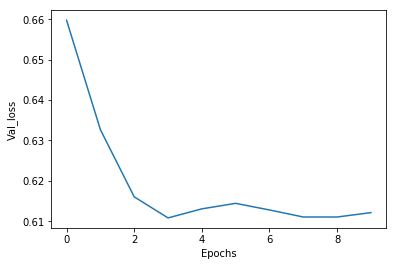

In [19]:
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Val_loss')
plt.show()

Test evauation and train evauation is the numpy array of the shape (number of fold, number of evaluation measures).

In [20]:
test_evaluation

array([[0.62982422, 0.676     , 1.        , 0.        , 0.        ,
        0.6843816 ],
       [0.62245077, 0.69599998, 1.        , 0.        , 0.        ,
        0.48502722]])

In [21]:
train_evaluation

array([[0.61902094, 0.69066668, 1.        , 0.        , 0.        ,
        0.64742959],
       [0.58678859, 0.72799999, 1.        , 0.        , 0.        ,
        0.53511727]])

## 5. Load the pretrained network for training

If you have pre-trianed model, you can use the pre-trained weight for next training. For using pre-trained weights, you have to use `warm_start` option in `training_inro` with addding the file path of the pre-trained weights in the `warm_start_model` option. Below is the example:

In [22]:
network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'lr': '0.01',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'network_class': 'DeepBiomeNetwork',
        'normalizer': 'normalize_minmax',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure'
    },
    'training_info': {
        'warm_start':'True',
        'warm_start_model':'./weight.h5',
        'batch_size': '200',
        'epochs': '10'
    },
    'validation_info': {
        'batch_size': 'None', 
        'validation_size': '0.2'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [23]:
test_evaluation, train_evaluation, network = deepbiome.deepbiome_train(log, network_info, path_info, number_of_fold=2)

[root    |INFO|deepbiome.py:100] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:137] -------1 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 1 simulation
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:514] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:518] Phylogenetic tree level list: ['Ge

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./weight_0.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/10
600/600 [==============================] - 0s 685us/step - loss: 0.6208 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6527 - val_loss: 0.6108 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6138
Epoch 2/10
600/600 [==============================] - 0s 66us/step - loss: 0.6219 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6652 - val_loss: 0.6121 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6141
Epoch 3/10
600/600 [==============================] - 0s 64us/step - loss: 0.6207 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6679 - val_loss: 0.6118 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000

[root    |INFO|build_network.py:151] Training end with time 1.7820320129394531!
[root    |INFO|build_network.py:79] Saved trained model weight at ./weight_0.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./weight_0.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./hist_0.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 6us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.00963902473449707!
[root    |INFO|build_network.py:183] Evaluation: [0.6185026168823242, 0.690666675567627, 1.0, 0.0, 0.0, 0.6314405798912048]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 14us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.010135889053344727!
[root    |INFO|build_network.py:183] Evaluation: [0.6300461888313293, 0.6759999990463257, 1.0, 0.0, 0.0, 0.628314733505249]
[root    |INFO|deepbiome.py:179] Compute time : 3.264826774597168
[root    |INFO|deepbiome.py:180] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------2 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 2 simulation
[root    |INFO|build_network.py:513] ----------------------------------------

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./weight_1.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/10
600/600 [==============================] - 0s 676us/step - loss: 0.5878 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5200 - val_loss: 0.5864 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6046
Epoch 2/10
600/600 [==============================] - 0s 66us/step - loss: 0.5850 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5276 - val_loss: 0.5864 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6102
Epoch 3/10
600/600 [==============================] - 0s 63us/step - loss: 0.5849 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5318 - val_loss: 0.5865 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000

[root    |INFO|build_network.py:151] Training end with time 1.7834501266479492!
[root    |INFO|build_network.py:79] Saved trained model weight at ./weight_1.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./weight_1.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./hist_1.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 8us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.013188362121582031!
[root    |INFO|build_network.py:183] Evaluation: [0.585158109664917, 0.7279999852180481, 1.0, 0.0, 0.0, 0.5787500739097595]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 17us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.011292695999145508!
[root    |INFO|build_network.py:183] Evaluation: [0.6171496510505676, 0.6959999799728394, 1.0, 0.0, 0.0, 0.511721134185791]
[root    |INFO|deepbiome.py:179] Compute time : 3.351147174835205
[root    |INFO|deepbiome.py:180] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:183] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:185] Train Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:188]       mean : [0.60183036 0.70933333 1.         0.         0.         0.60509533]
[root    |INFO|deepbiome.py:189]        std : [0.01667225 0.01866665 0.         0.         0.         0.02634525]
[root    |INFO|deepbiome.py:190] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:192] Test Evaluation : ['loss' 'binary_accuracy'

## 6. Load the pretrained network for testing

If you want to test the trained model, you can use the `deepbiome_test` function. If you use the index file, this function provide the evaluation using test index (index set not included in the index file) for each fold. If not, this function provide the evaluation using the whole samples.

In [24]:
evaluation = deepbiome.deepbiome_test(log, network_info, path_info, number_of_fold=2)

[root    |INFO|deepbiome.py:259] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:289] Test Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:291] -------1 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:301] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:302] Build network for 1 fold testing
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:514] Read phylogenetic tree information from /DATA/home/muha/github_

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:311] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:312] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 362us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.22993159294128418!
[root    |INFO|build_network.py:183] Evaluation: [0.6300461888313293, 0.6759999990463257, 1.0, 0.0, 0.0, 0.628314733505249]
[root    |INFO|deepbiome.py:315] 
[root    |INFO|deepbiome.py:317] Compute time : 1.503005027770996
[root    |INFO|deepbiome.py:318] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:291] -------2 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:301] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:302] Build network for 2 fold testing
[root    |INFO|build_network.py:513] ------

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:311] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:312] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 284us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.21828627586364746!
[root    |INFO|build_network.py:183] Evaluation: [0.6171496510505676, 0.6959999799728394, 1.0, 0.0, 0.0, 0.511721134185791]
[root    |INFO|deepbiome.py:315] 
[root    |INFO|deepbiome.py:317] Compute time : 1.435542106628418
[root    |INFO|deepbiome.py:318] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:321] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:323] Test Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:326]       mean : [0.62359792 0.68599999 1.         0.         0.         0.57001793]
[root    |INFO|deepbiome.py:327]        std : [0.00644827 0.00999999 0.         0.         0.         0.0582968 ]
[root    |INFO|deepbiome.py:328] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:331] Total Compu

This function provide the evaluation result as a numpy array of the shape (number of fold, number of evaluation measures).

In [25]:
evaluation

array([[0.63004619, 0.676     , 1.        , 0.        , 0.        ,
        0.62831473],
       [0.61714965, 0.69599998, 1.        , 0.        , 0.        ,
        0.51172113]])